This data is taken from a Washington Post database of police shootings since 2015, available on Github at https://github.com/washingtonpost/data-police-shootings.

There are two databases to consider. The first one is a record of fatal police shootings with the names of the people shot, ages, and whether or not they were having a mental health crisis, among other data points.

The second is the name of the agencies involved in the police shootings. The Washington Post only started compiling this data since 2022.

I also have data from the U.S. Census Bureau American Community Survey entitled "Family Income" since 2015 with race data included. In the United States, race is considered to be a strong factor in police shootings. The analysis should present a view into both police shootings and how race is  embedded in the data.

Questions to Ask About The Data
1. What is the average age of the person killed by police in the United States?
2. Is race a factor in police deaths in the USA?
3. Is mental health a factor?
4. Is race a factor?
5. What is the gender of the person killed by the police?
6. Which police departments have the highest rates of police deaths in the USA? 
7. Where are these police departments located?

First, I have to import the needed libraries.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Now I import the fatal police shootings file from the Washington Post for analysis.

In [9]:
fatal_police_shootings = pd.read_csv('./data-police-shootings-master/fatal-police-shootings-data.csv')
fatal_police_shootings

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,10556,2024-06-09,shoot,not,gun,Arlington,Tarrant,TX,32.639240,-97.134632,block,Shannon Boyd,42.0,male,NaN,NaN,False,False,698
9763,10558,2024-06-09,move,not,knife,Fort Myers,Lee,FL,26.623818,-81.870243,block,Willy Lumaine,33.0,male,NaN,NaN,False,False,2735
9764,10555,2024-06-10,attack,not,unarmed,Clayton,Johnston,NC,35.628668,-78.503463,address,NaN,NaN,male,NaN,NaN,False,False,1807
9765,10561,2024-06-10,attack,not,other,Belfast,Waldo,ME,NaN,NaN,NaN,Daniel Ryan,65.0,male,NaN,NaN,False,False,27092


In [10]:
fatal_police_shootings.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [13]:
fatal_police_shootings.tail()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
9762,10556,2024-06-09,shoot,not,gun,Arlington,Tarrant,TX,32.639240,-97.134632,block,Shannon Boyd,42.0,male,NaN,NaN,False,False,698
9763,10558,2024-06-09,move,not,knife,Fort Myers,Lee,FL,26.623818,-81.870243,block,Willy Lumaine,33.0,male,NaN,NaN,False,False,2735
9764,10555,2024-06-10,attack,not,unarmed,Clayton,Johnston,NC,35.628668,-78.503463,address,NaN,NaN,male,NaN,NaN,False,False,1807
9765,10561,2024-06-10,attack,not,other,Belfast,Waldo,ME,NaN,NaN,NaN,Daniel Ryan,65.0,male,NaN,NaN,False,False,27092
9766,10562,2024-06-10,undetermined,not,gun,Lewistown,Mifflin,PA,40.597660,-77.579462,block,Ridge Ryen Rhodes,29.0,male,W,photo,False,False,NaN


So far from the data, I see that there are both city/county/state columns and actual latitude and longitude data. Also, the age is not an integer but a float.

Also, there were 9766 fatal shootings by police in the USA from 2015 to the last date, which was in June of 2024.

In [12]:
fatal_police_shootings.dtypes

id                              int64
date                           object
threat_type                    object
flee_status                    object
armed_with                     object
city                           object
county                         object
state                          object
latitude                      float64
longitude                     float64
location_precision             object
name                           object
age                           float64
gender                         object
race                           object
race_source                    object
was_mental_illness_related       bool
body_camera                      bool
agency_ids                     object
dtype: object

Now we also know whether or not the police officer or sheriff had a body camera on as well, and whether or not mental illness played a part in the encounter.

Cleaning the Data

Let's fix the float problem with the age first.

In [19]:
fatal_police_shootings.isna()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
9763,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
9764,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
9765,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False


In [20]:
fatal_police_shootings.isna().any()

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                            True
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                     True
dtype: bool

In [21]:
nan_counts_per_column = fatal_police_shootings.isna().sum()
print(nan_counts_per_column)

id                               0
date                             0
threat_type                     68
flee_status                   1335
armed_with                     211
city                            71
county                        4705
state                            0
latitude                      1072
longitude                     1072
location_precision            1072
name                           328
age                            381
gender                          28
race                          1147
race_source                   1123
was_mental_illness_related       0
body_camera                      0
agency_ids                       1
dtype: int64


Looks like I have a problem. I don't want to remove the NA data because I need the total number of police shootings. Instead, I will take an average age and put it into the NA values in the 'age' column. It is not a perfect solution, but there is so much data here that I don't want to lose any.

Here is the file with the agencies (local police, sheriff, etc.) that fatally shot the people.

First, I need the average age of the column.

In [17]:
total_age = fatal_police_shootings['age'].sum()
total_age


351148.0

To get the average, I divide the total number of people killed by police into the total age. I also have to subtract off the 381 nulls.

In [22]:
average_age = 351148 / (9766-381)
average_age

37.41587639850826

The average age is 37. Now I need to convert the 381 NaN values to 37. 

In [29]:
fatal_police_shootings['age'] = fatal_police_shootings['age'].fillna(37)
fatal_police_shootings.isna().any()

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                           False
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                     True
dtype: bool

In [32]:
fatal_police_shootings['age'] = fatal_police_shootings['age'].astype('int64')
fatal_police_shootings.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,H,not_available,False,False,473


In [33]:
fatal_police_shootings.tail()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
9762,10556,2024-06-09,shoot,not,gun,Arlington,Tarrant,TX,32.639240,-97.134632,block,Shannon Boyd,42,male,NaN,NaN,False,False,698
9763,10558,2024-06-09,move,not,knife,Fort Myers,Lee,FL,26.623818,-81.870243,block,Willy Lumaine,33,male,NaN,NaN,False,False,2735
9764,10555,2024-06-10,attack,not,unarmed,Clayton,Johnston,NC,35.628668,-78.503463,address,NaN,37,male,NaN,NaN,False,False,1807
9765,10561,2024-06-10,attack,not,other,Belfast,Waldo,ME,NaN,NaN,NaN,Daniel Ryan,65,male,NaN,NaN,False,False,27092
9766,10562,2024-06-10,undetermined,not,gun,Lewistown,Mifflin,PA,40.597660,-77.579462,block,Ridge Ryen Rhodes,29,male,W,photo,False,False,NaN


Now we know the number of fatal police shootings (9766) and the average age of the person fatally shot (37). What about gender?

In [40]:
males_killed = fatal_police_shootings['gender'].value_counts()['male']
males_killed

9307

In [39]:
females_killed = 9766 - 9307
females_killed

459

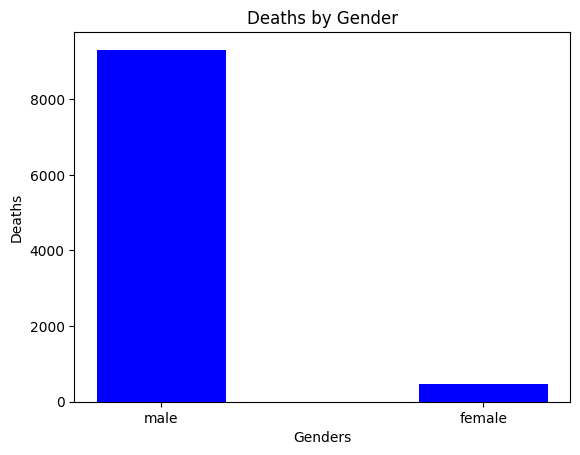

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset

genders = ['male', 'female']
deaths = ['males_killed', 'females_killed']
data = {'male': males_killed, 'female': females_killed,}
gendered_deaths = list(data.keys())
gender_info = list(data.values())

# creating the bar plot
plt.bar(gendered_deaths, gender_info, color ='blue', 
        width = 0.4)
 
plt.xlabel("Genders")
plt.ylabel("Deaths")
plt.title("Deaths by Gender")
plt.show()

That means that out of 9766 people fatally shot by police, 9307 were male and 459 female. People of both genders commit crimes, even violent crimes, and half of the population is female. Therefore, there is a huge gender bias in fatal police shootings. 

Now the focus is on race. There are a lot of NaN values for this, and taking an average seems like an improper move. Instead, it is time to create a new dataframe without the NaNs for race. Race is w = White, a = Asian, h = Hispanic.

In [51]:
fatal_police_shootings['age'] = fatal_police_shootings['age'].fillna(37)
fatal_police_shootings.isna().any()

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                           False
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                     True
dtype: bool

In [70]:
fatal_shootings_race = fatal_police_shootings.dropna(subset=['race'])
fatal_shootings_race

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,10538,2024-06-05,shoot,foot,gun,Jacksonville,Onslow,NC,34.757237,-77.406540,address,Jammie Mitchell,39,male,B,photo,False,False,3620
9753,10549,2024-06-06,move,not,knife,Homestead,Miami-Dade,FL,25.471590,-80.478196,address,Gabriel Gelpi Rodriguez,33,male,H,photo,False,False,219
9755,10548,2024-06-07,point,not,gun,Hiram,Oxford,ME,43.895386,-70.810995,address,Steven Paul Nelson,39,male,W,photo,False,False,514
9759,10554,2024-06-08,attack,not,blunt_object,Corinth,Alcorn,MS,34.859798,-88.610056,address,NaN,37,male,W,clip,False,False,3165


In [71]:
fatal_shootings_race.isna().any()

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                           False
gender                         True
race                          False
race_source                   False
was_mental_illness_related    False
body_camera                   False
agency_ids                     True
dtype: bool

In [74]:
fatal_shootings_race['race'].replace('W', "white", inplace=True)
fatal_shootings_race.head()

C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_3728\1463873303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_shootings_race['race'].replace('W', "white", inplace=True)


,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,white,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,white,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,H,not_available,False,False,473


In [75]:
fatal_shootings_race['race'].replace('W', "White", inplace=True)
fatal_shootings_race['race'].replace('A', "Asian", inplace=True)
fatal_shootings_race['race'].replace('B', "Black", inplace=True)
fatal_shootings_race.head()

C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_3728\89136465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_shootings_race['race'].replace('W', "White", inplace=True)
C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_3728\89136465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_shootings_race['race'].replace('A', "Asian", inplace=True)
C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_3728\89136465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,Asian,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,white,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,white,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,H,not_available,False,False,473


In [77]:
fatal_shootings_race['race'].replace('H', "Hispanic", inplace=True)
fatal_shootings_race

C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_3728\2325575277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_shootings_race['race'].replace('H', "Hispanic", inplace=True)


,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,Asian,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,white,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,Hispanic,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,white,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,Hispanic,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,10538,2024-06-05,shoot,foot,gun,Jacksonville,Onslow,NC,34.757237,-77.406540,address,Jammie Mitchell,39,male,Black,photo,False,False,3620
9753,10549,2024-06-06,move,not,knife,Homestead,Miami-Dade,FL,25.471590,-80.478196,address,Gabriel Gelpi Rodriguez,33,male,Hispanic,photo,False,False,219
9755,10548,2024-06-07,point,not,gun,Hiram,Oxford,ME,43.895386,-70.810995,address,Steven Paul Nelson,39,male,white,photo,False,False,514
9759,10554,2024-06-08,attack,not,blunt_object,Corinth,Alcorn,MS,34.859798,-88.610056,address,NaN,37,male,white,clip,False,False,3165


In [78]:
fatal_shootings_race['race'].replace('white', "White", inplace=True)
fatal_shootings_race

C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_3728\2226251600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_shootings_race['race'].replace('white', "White", inplace=True)


,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,Asian,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,White,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,Hispanic,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,White,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,Hispanic,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,10538,2024-06-05,shoot,foot,gun,Jacksonville,Onslow,NC,34.757237,-77.406540,address,Jammie Mitchell,39,male,Black,photo,False,False,3620
9753,10549,2024-06-06,move,not,knife,Homestead,Miami-Dade,FL,25.471590,-80.478196,address,Gabriel Gelpi Rodriguez,33,male,Hispanic,photo,False,False,219
9755,10548,2024-06-07,point,not,gun,Hiram,Oxford,ME,43.895386,-70.810995,address,Steven Paul Nelson,39,male,White,photo,False,False,514
9759,10554,2024-06-08,attack,not,blunt_object,Corinth,Alcorn,MS,34.859798,-88.610056,address,NaN,37,male,White,clip,False,False,3165


Now it is time to total the number of people in each racial category.

In [82]:
asian_people_killed = fatal_shootings_race['race'].value_counts()['Asian']
asian_people_killed

172

In [83]:
black_people_killed = fatal_shootings_race['race'].value_counts()['Black']
black_people_killed

2304

In [84]:
white_people_killed = fatal_shootings_race['race'].value_counts()['White']
white_people_killed

4381

In [85]:
hispanic_people_killed = fatal_shootings_race['race'].value_counts()['Hispanic']
hispanic_people_killed

1592


To wrap up this segment, there were Hispanic = 1592, White = 4381, Asian = 172, and Black = 2304. 

Now it is time to visualize the data.

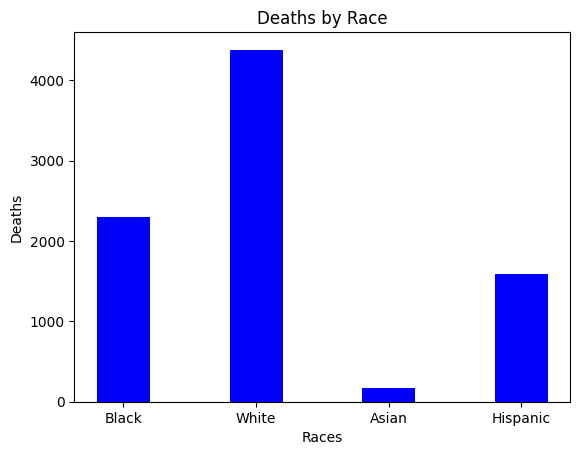

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset

races = ['White', 'Hispanic', "Black", "Asian"]
deaths = [hispanic_people_killed, black_people_killed, white_people_killed, asian_people_killed]
data = {'Black': black_people_killed, 'White': white_people_killed, 'Asian': asian_people_killed, 'Hispanic': hispanic_people_killed}
races_deaths = list(data.keys())
racial_deaths = list(data.values())

# creating the bar plot
plt.bar(races_deaths, racial_deaths, color ='blue', 
        width = 0.4)
 
plt.xlabel("Races")
plt.ylabel("Deaths")
plt.title("Deaths by Race")
plt.show()

This will be analzyed in greater detail with demographic data.

Before getting to the demographics, it's time to look at the "mentally ill" segment. What portion of the people killed by police were mentally ill?

In [119]:
fatal_police_shootings.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,H,not_available,False,False,473


In [130]:
fatal_police_shootings.tail()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
9762,10556,2024-06-09,shoot,not,gun,Arlington,Tarrant,TX,32.639240,-97.134632,block,Shannon Boyd,42,male,NaN,NaN,False,False,698
9763,10558,2024-06-09,move,not,knife,Fort Myers,Lee,FL,26.623818,-81.870243,block,Willy Lumaine,33,male,NaN,NaN,False,False,2735
9764,10555,2024-06-10,attack,not,unarmed,Clayton,Johnston,NC,35.628668,-78.503463,address,NaN,37,male,NaN,NaN,False,False,1807
9765,10561,2024-06-10,attack,not,other,Belfast,Waldo,ME,NaN,NaN,NaN,Daniel Ryan,65,male,NaN,NaN,False,False,27092
9766,10562,2024-06-10,undetermined,not,gun,Lewistown,Mifflin,PA,40.597660,-77.579462,block,Ridge Ryen Rhodes,29,male,W,photo,False,False,NaN


There is a Boolean true/false for "was_mental_illness_related.

In [121]:
fatal_police_shootings['was_mental_illness_related'].isna().any()

False

So the Boolean true or false is in all of the entries. How many fatal police shootings were related to mental illness?

In [129]:
mentally_ill = fatal_police_shootings['was_mental_illness_related'].value_counts()
mentally_ill

was_mental_illness_related
False    7841
True     1926
Name: count, dtype: int64

There were 7841 false and 1926 true. 

In [133]:
mentally_ill_percent = 1926 / 9766
print(f"The percentage of mentally ill people killed by police from the total of 9766 is : {mentally_ill_percent * 100}%.")

The percentage of mentally ill people killed by police from the total of 9766 is : 19.72148269506451%.


Therefore, the percentage of people having a mental crisis killed by police is very close to 20%, or 1/5 of the people killed by police. The police are not mental health professionals. If someone is having a mental health crisis, a crisis team of mental health professionals would be a better choice.

The next thing to investigate is body cam footage. Body cams are cameras police wear to provide a record of their actions and the actions of those with whom they interact.

In [162]:
fatal_police_shootings.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39,male,H,not_available,False,False,473


In [165]:
fatal_police_shootings['body_camera'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9762    False
9763    False
9764    False
9765    False
9766    False
Name: body_camera, Length: 9767, dtype: bool

In [164]:
body_camera = fatal_police_shootings['body_camera'].value_counts()
body_camera

body_camera
False    8110
True     1657
Name: count, dtype: int64

In [174]:
body_camera_percent = 1657 / 9766
print(f"The percentage of police wearing a body camera from the total of 9766 is : {body_camera_percent * 100} %.")

The percentage of police wearing a body camera from the total of 9766 is : 16.9670284661069 %.


So, about 17% of the police officers were wearing a body camera. If all the police officers had been wearing body cameras, would there have been less deaths? It is probable, but it is impossible to quantify a what-if scenario.

Neilsberg Data has the United States Population by Race and Ethnicity dataset, found at  https://www.neilsberg.com/insights/united-states-population-by-race/. 

In [176]:
racial_data_2023 = pd.read_csv('./united_states_population_by_race_2023.csv')
racial_data_2023

,Race,Population,% of Total Population
0,White,"224,789,109",68.17%
1,Black or African American,"41,393,012",12.55%
2,American Indian and Alaska Native,"2,722,661",0.83%
3,Asian,"18,782,924",5.70%
4,Native Hawaiian and Other Pacific Islander,"615,557",0.19%
5,Some other race,"18,382,796",5.58%
6,Two or more races (multiracial),"23,039,422",6.99%


Here is the racial data from the people killed by police once more.

In [178]:
black_people_killed

2304

In [179]:
white_people_killed

4381

In [180]:
asian_people_killed

172

In [181]:
hispanic_people_killed

1592

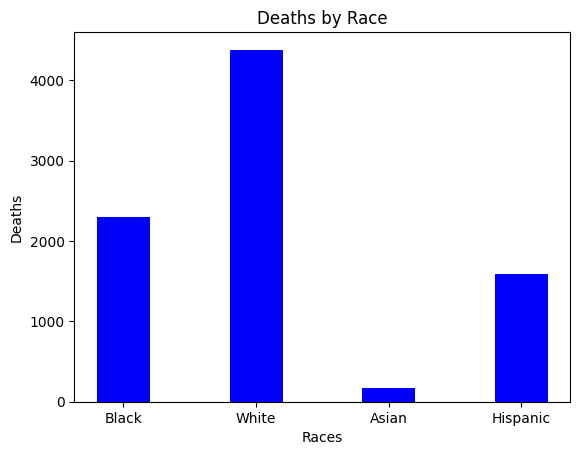

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset

races = ['White', 'Hispanic', "Black", "Asian"]
deaths = [hispanic_people_killed, black_people_killed, white_people_killed, asian_people_killed]
data = {'Black': black_people_killed, 'White': white_people_killed, 'Asian': asian_people_killed, 'Hispanic': hispanic_people_killed}
races_deaths = list(data.keys())
racial_deaths = list(data.values())

# creating the bar plot
plt.bar(races_deaths, racial_deaths, color ='blue', 
        width = 0.4)
 
plt.xlabel("Races")
plt.ylabel("Deaths")
plt.title("Deaths by Race")
plt.show()

So:
* Black people killed: 2304
* White people killed: 4381
* Hispanic people killed: 1592
* Asian people killed: 172
This totals to 8449, so we are missing some racial data.
* Total people killed: 9766

In [185]:
percent_killed_hispanic = (1592 / 8449) * 100
percent_killed_hispanic

18.842466564090422

In [186]:
percent_killed_black = (2304 / 8449) * 100
percent_killed_black

27.269499349035385

In [187]:
percent_killed_white = (4381 / 8449) * 100
percent_killed_white

51.85229021185938

In [188]:
percent_killed_asian = (172 / 8449) * 100
percent_killed_asian

2.0357438750147945

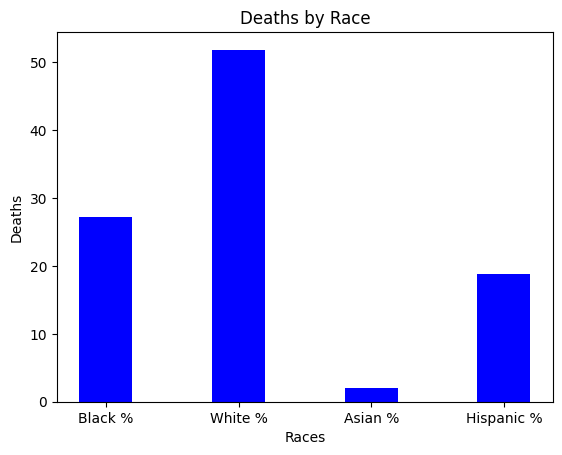

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset

races = ['White', 'Hispanic', "Black", "Asian"]
percentages = [percent_killed_asian, percent_killed_black, percent_killed_white, percent_killed_asian]
data = {'Black %': percent_killed_black, 'White %': percent_killed_white, 'Asian %': percent_killed_asian, 'Hispanic %': percent_killed_hispanic}
races_deaths = list(data.keys())
racial_deaths = list(data.values())

# creating the bar plot
plt.bar(races_deaths, racial_deaths, color ='blue', 
        width = 0.4)
 
plt.xlabel("Races")
plt.ylabel("Deaths")
plt.title("Deaths by Race")
plt.show()

According to Neilsberg Data, 
* Black people make up 12.55% of the US population, but they make up 27% of police deaths.
* White people make up 68.17% of the US population, but they make up 52% of police deaths.
* Hispanic people make up 5.58% ("some other race") of the US population, but they make up 19% of police deaths.
* Asian people make up 5.70% of the US population, but they make up 2% of police deaths.

People from all races break the law. That's because race is actually the level and hue of melanin in the skin, therefore a social construct. People commit crimes. It is obvious from these statistics that at least some of the shootings have a racial component. 

Here is the data on police agencies that have had fatal shootings by police.

In [87]:
fatal_police_agencies = pd.read_csv('./data-police-shootings-master/fatal-police-shootings-agencies.csv')
fatal_police_agencies

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1
2,2114,Abilene Police Department,local_police,TX,TX22101,6
3,2088,Abington Township Police Department,local_police,PA,PA04601,1
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1
...,...,...,...,...,...,...
3568,226,Yuba County Sheriff's Office,sheriff,CA,CA05800,5
3569,1874,Yuma County Sheriff's Department,sheriff,AZ,AZ01400,3
3570,1360,Yuma Police Department,local_police,AZ,AZ01405,3
3571,3077,Zapata County Sheriff's Department,sheriff,TX,TX25300,1



So far, we can see that 3572 agencies have been responsible for the 9766 fatal shootings of the populace by police.

In [100]:
fatal_police_agencies.dtypes

id                  int64
name               object
type               object
state              object
oricodes           object
total_shootings     int64
dtype: object

Which agency had the most shootings?


In [99]:
max_values = fatal_police_agencies.loc[fatal_police_agencies['total_shootings'].idxmax()]
print(max_values)

id                                            38
name               Los Angeles Police Department
type                                local_police
state                                         CA
oricodes                                 CA01942
total_shootings                              138
Name: 1854, dtype: object


The Los Angeles Police Department has the largest number of fatal shootings by police, at 38.

In [102]:
percent_fatal = 38/9766
percent_fatal

0.0038910505836575876

So this department is responsible for less than 1% of the total police deaths.

What are the top states for shootings? California is on the list because the most fatal shootings by police occur in Los Angeles.

In [108]:
state_sorted = fatal_police_agencies.sort_values(['total_shootings', 'state'], ascending=False)
state_sorted

,id,name,type,state,oricodes,total_shootings
1854,38,Los Angeles Police Department,local_police,CA,CA01942,138
2483,80,Phoenix Police Department,local_police,AZ,AZ00723,119
1853,20,Los Angeles County Sheriff's Department,sheriff,CA,CA01900,112
1467,102,Houston Police Department,local_police,TX,TXHPD00,82
2250,298,New York Police Department,local_police,NY,NY03030,78
...,...,...,...,...,...,...
1005,3058,Fairbanks International Airport Police Department,local_other,AK,AK00126,1
1611,2666,Juneau Police Department,local_police,AK,AK00103,1
2406,3209,Palmer Police Department,local_police,AK,AK00117,1
2855,1900,Seward Police Department,local_police,AK,AK00108,1


California, Arizona, Texas, and New York have the highest number of police shootings.

Are police or sheriffs responsible for more fatal shootings of members of the populace? This data should give us a rural vs. urban skew, since sheriffs are mainly found outside urban areas.

In [109]:
sheriff_sorted = fatal_police_agencies.sort_values(['total_shootings', 'type'], ascending=False)
sheriff_sorted

,id,name,type,state,oricodes,total_shootings
1854,38,Los Angeles Police Department,local_police,CA,CA01942,138
2483,80,Phoenix Police Department,local_police,AZ,AZ00723,119
1853,20,Los Angeles County Sheriff's Department,sheriff,CA,CA01900,112
1467,102,Houston Police Department,local_police,TX,TXHPD00,82
2250,298,New York Police Department,local_police,NY,NY03030,78
...,...,...,...,...,...,...
3291,1350,U.S. Marshals Service,federal,WY,WYUSM0100,1
3293,2727,U.S. Marshals Service's High Plains Fugitive T...,federal,ID,NaN,1
3296,2984,U.S. Marshals Service Violent Fugitive Task Force,federal,OH,NaN,1
3297,1970,U.S. Park Police,federal,VA,NaN,1


The local police seem to be responsible for more populace shooting deaths, which may point to there being more shootings in urban areas than rural ones. Federal police seem to be responsible for lower numbers of shootings.

I must remove the NaN values for this dataset to perform an analysis.

In [111]:
sheriff_sorted = fatal_police_agencies.dropna()
sheriff_sorted

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1
2,2114,Abilene Police Department,local_police,TX,TX22101,6
3,2088,Abington Township Police Department,local_police,PA,PA04601,1
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1
...,...,...,...,...,...,...
3568,226,Yuba County Sheriff's Office,sheriff,CA,CA05800,5
3569,1874,Yuma County Sheriff's Department,sheriff,AZ,AZ01400,3
3570,1360,Yuma Police Department,local_police,AZ,AZ01405,3
3571,3077,Zapata County Sheriff's Department,sheriff,TX,TX25300,1


In [112]:
sheriff = sheriff_sorted['type'].value_counts()['sheriff']
sheriff

1117

In [113]:
local_police = sheriff_sorted['type'].value_counts()['local_police']
local_police

2130

In [114]:
federal = sheriff_sorted['type'].value_counts()['federal']
federal

77

So 2130 local police agencies, 1117 sheriffs, and 77 federal police agencies fatally shot members of the populace.

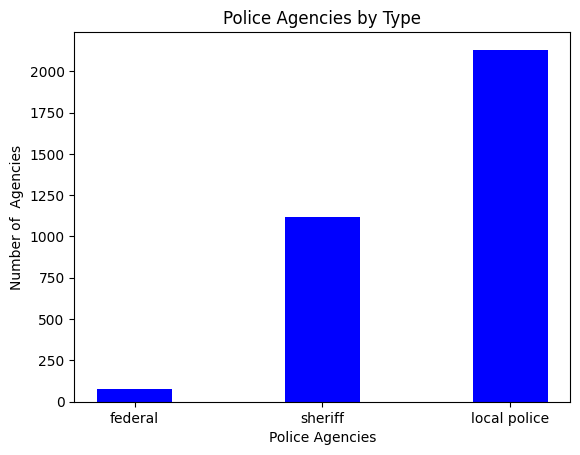

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset

police_agencies = ['federal', 'sheriff', "local_police"]
data = {'federal': federal, 'sheriff': sheriff, 'local police': local_police}
police_agencies = list(data.keys())
police_agencies_by_type = list(data.values())

# creating the bar plot
plt.bar(police_agencies, police_agencies_by_type, color ='blue', 
        width = 0.4)
 
plt.xlabel("Police Agencies")
plt.ylabel("Number of  Agencies")
plt.title("Police Agencies by Type")
plt.show()

Demographic, police agencies, and the fatal shootings by police paint a stark picture of gender and racial inequalities in the USA. 20% of the people shot were mentally ill. Bodycams were only used in 20% of the shootings. In addition, poverty and the urban/rural dynamic play their roles in this situation.

Bodycams, mental health professionals that respond to the crises of the mentally ill, and a close examinations of the criteria in which deadly force can and cannot be used are all ways to combat this situation. 

The nearly ten thousand people who were killed by police since 2015 point to something being horribly wrong in the USA. The Washington Post is attempting to hold police departments in the USA accountable for the loss of life. The people shot never had their day in court, and therefore guilt or innocence of the people shot by police has not been established. Even if every single one of these nearly ten thousand people were guilty of committing a crime,  it should not have been a death sentence. 

Bodycams should be a part of every police uniform, at least when out on a call, and mentally ill people should get an evaluation by a mental health professional. These changes would cost time, money, and lots of work to implement, but the cost of not acting is in human lives. 